In [1]:
!pip install yfinance --user

In [2]:
import yfinance as yf  
from datetime import date
import matplotlib.pyplot as plt

data = yf.download('NOVO-B.CO','2014-01-01',date.today())

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-04,871.700012,874.299988,859.000000,860.599976,860.599976,2201258
2024-04-05,856.500000,870.000000,848.799988,867.500000,867.500000,2774059
2024-04-08,865.500000,874.900024,862.799988,871.599976,871.599976,1598156
2024-04-09,875.000000,877.900024,856.400024,857.700012,857.700012,1941371
2024-04-10,857.000000,866.000000,845.099976,866.000000,866.000000,1540552
2024-04-11,856.599976,873.500000,856.500000,869.299988,869.299988,2276247
2024-04-12,870.000000,891.900024,868.599976,880.000000,880.000000,2064725
2024-04-15,879.000000,888.000000,876.000000,879.200012,879.200012,1814697
2024-04-16,862.000000,872.099976,854.700012,867.500000,867.500000,1728440


In [4]:
data.isnull().sum().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2572 entries, 2014-01-02 to 2024-04-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2572 non-null   float64
 1   High       2572 non-null   float64
 2   Low        2572 non-null   float64
 3   Close      2572 non-null   float64
 4   Adj Close  2572 non-null   float64
 5   Volume     2572 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 140.7 KB


In [6]:
data.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2024-04-04', '2024-04-05', '2024-04-08', '2024-04-09',
               '2024-04-10', '2024-04-11', '2024-04-12', '2024-04-15',
               '2024-04-16', '2024-04-17'],
              dtype='datetime64[ns]', name='Date', length=2572, freq=None)

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000,2.572000e+03
mean,256.440251,259.270315,253.710303,256.605171,240.410564,5.028926e+06
std,170.245949,172.427857,168.309616,170.551993,175.542686,2.759683e+06
min,100.000000,101.750000,99.000000,100.449997,80.917427,2.800000e+03
25%,151.212502,152.518745,149.768745,150.962502,133.240551,3.330513e+06
50%,186.000000,187.500000,183.724998,185.550003,158.280304,4.453595e+06
75%,318.412498,322.550011,315.074989,319.862503,308.632408,5.963490e+06
max,920.000000,932.000000,909.200012,924.500000,917.880920,4.282551e+07


<AxesSubplot:xlabel='Date'>

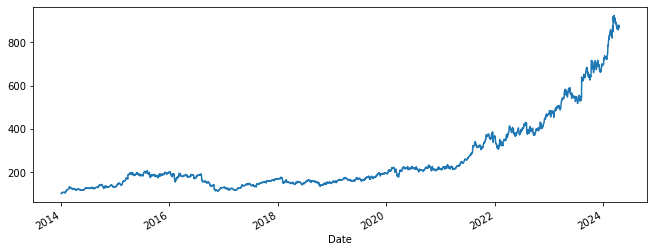

In [8]:
data['Close'].plot(figsize=(11,4))

<AxesSubplot:xlabel='Close', ylabel='Count'>

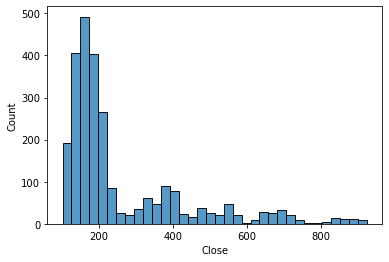

In [9]:
import seaborn as sns
sns.histplot(data['Close'])

In [10]:
!pip install statsmodels --user

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
#Additive Decompositon
# 20 monthly working days (5 for each week)
add_result = seasonal_decompose(data['Close'], model = 'additive', period=20)
add_result

Text(0.5, 0.98, '\nAdditive Decompose')

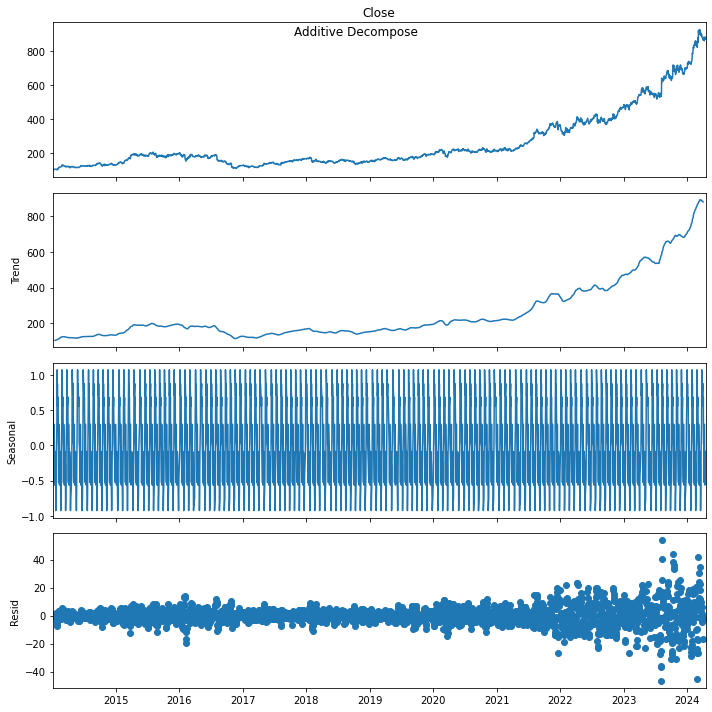

In [13]:
plt.rcParams.update({'figure.figsize': (10,10)})

add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)

In [14]:
import statsmodels.tsa.stattools as st

In [15]:
def adf(series):
    result = st.adfuller(series)
    print("AD: {}".format(result[0]))
    print("P-value: {}".format(result[1]))
    if result[1] <= 0.05:
        print("Is stationary")
    else:
        print("Not stationary")

In [16]:
def kpss(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [17]:
adf(data['Close'])

AD: 3.3126649591914292
P-value: 1.0
Not stationary


In [18]:
kpss_p_value = st.kpss(data['Close'])[1]
if kpss_p_value < 0.05:
    print("Data is non-stationary.")
else:
    print("Data is Stationary.")

Data is non-stationary.


<ipython-input-18-033fc60d638b>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p_value = st.kpss(data['Close'])[1]


In [19]:
data['First_differencing'] = data['Close'].diff(periods=1)

In [20]:
adf(data['First_differencing'].dropna())

AD: -8.352286522904297
P-value: 2.972372639414696e-13
Is stationary


In [21]:
kpss_p_value = st.kpss(data['First_differencing'].dropna())[1]
if kpss_p_value < 0.05:
    print("Data is non-stationary.")
else:
    print("Data is Stationary.")

Data is non-stationary.


<ipython-input-21-cb1b516ad38f>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p_value = st.kpss(data['First_differencing'].dropna())[1]


In [22]:
data['Second_differencing'] = data['Close'].diff(periods=25)

In [23]:
adf(data['Second_differencing'].dropna())

AD: -6.398411670712516
P-value: 2.0237043331337248e-08
Is stationary


In [24]:
kpss_p_value = st.kpss(data['Second_differencing'].dropna())[1]
if kpss_p_value < 0.05:
    print("Data is non-stationary.")
else:
    print("Data is Stationary.")

Data is non-stationary.


<ipython-input-24-0468e0cc67f8>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p_value = st.kpss(data['Second_differencing'].dropna())[1]


In [25]:
import numpy as np
data['Log_transformed'] =np.log(data["Close"])

<AxesSubplot:xlabel='Date'>

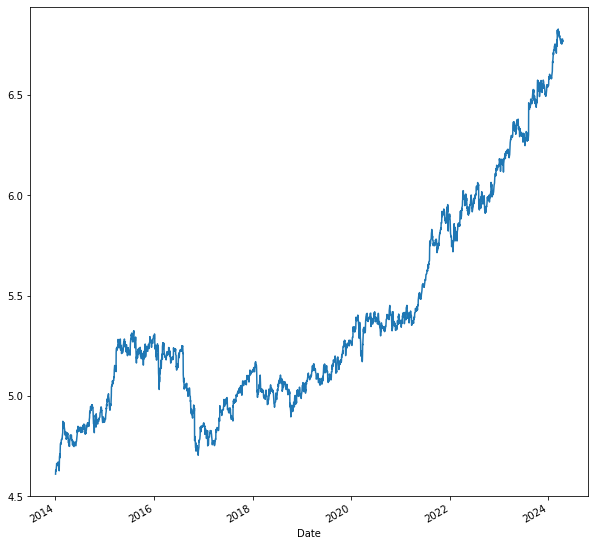

In [26]:
data['Log_transformed'].plot()

In [27]:
adf(data['Log_transformed'].dropna())

AD: 0.737918472011694
P-value: 0.9905649997778474
Not stationary


In [28]:
kpss_p_value = st.kpss(data['Log_transformed'].dropna())[1]
if kpss_p_value < 0.05:
    print("Data is non-stationary.")
else:
    print("Data is Stationary.")

Data is non-stationary.


<ipython-input-28-c6fc76123fc4>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p_value = st.kpss(data['Log_transformed'].dropna())[1]


In [29]:
data['Log_diff_1'] = data['Log_transformed'].diff(periods=1)

In [30]:
adf(data['Log_diff_1'].dropna())

AD: -52.29889821790625
P-value: 0.0
Is stationary


In [31]:
kpss_p_value = st.kpss(data['Log_diff_1'].dropna())[1]
if kpss_p_value < 0.05:
    print("Data is non-stationary.")
else:
    print("Data is Stationary.")

Data is Stationary.


<ipython-input-31-216566f626d9>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p_value = st.kpss(data['Log_diff_1'].dropna())[1]


<AxesSubplot:xlabel='Date'>

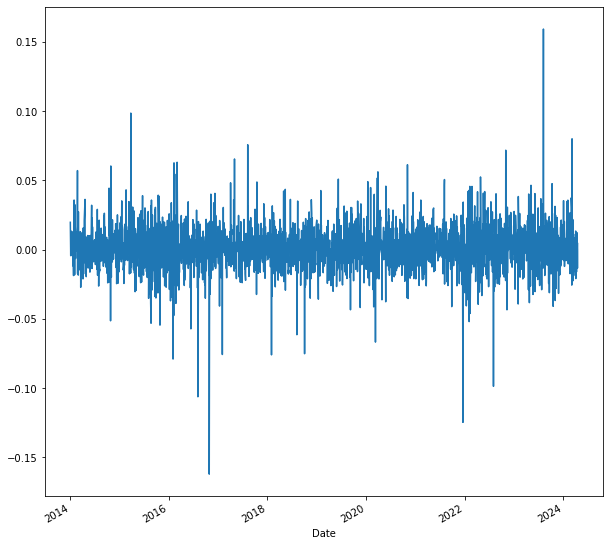

In [32]:
data['Log_diff_1'].plot()

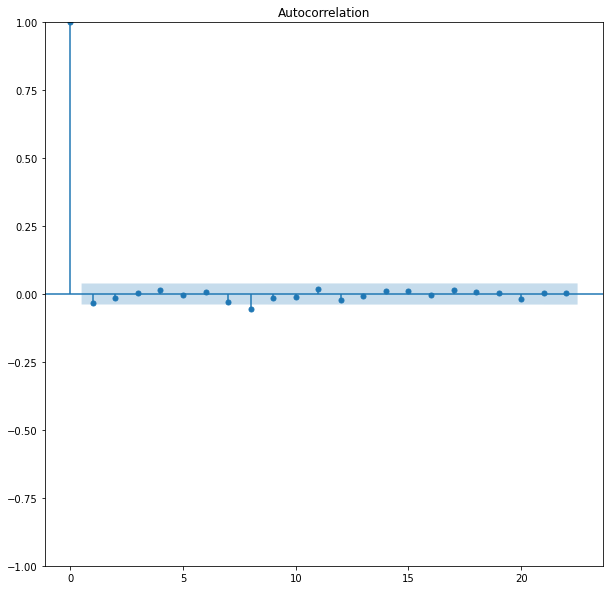

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data['Log_diff_1'].dropna(),lags=22)

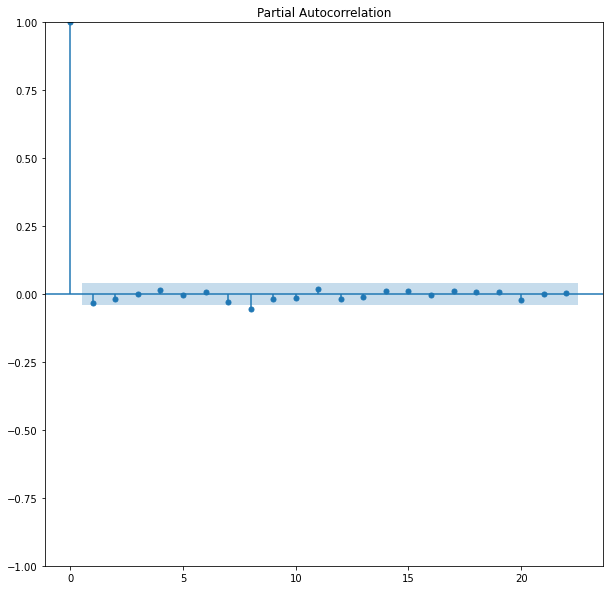

In [34]:
pacf = plot_pacf(data['Log_diff_1'].dropna(),lags=22)

In [35]:
# 2,1,3
# 5,1,5

In [36]:
!pip install statsmodels

In [37]:
from statsmodels.tsa.arima.model import ARIMA

close = data['Log_transformed']
size = int(len(close)*0.8)
train, test = close.iloc[:size], close[size:]

In [38]:
p,d,q = 2,1,3

In [39]:
model = ARIMA(train, order=(p,d,q))
arima_model = model.fit()
print(arima_model.summary())

C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as st

                               SARIMAX Results                                
Dep. Variable:        Log_transformed   No. Observations:                 2057
Model:                 ARIMA(2, 1, 3)   Log Likelihood                5517.948
Date:                Thu, 18 Apr 2024   AIC                         -11023.896
Time:                        16:28:26   BIC                         -10990.125
Sample:                             0   HQIC                        -11011.513
                               - 2057                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0083      2.050     -0.004      0.997      -4.026       4.009
ar.L2         -0.0037      1.707     -0.002      0.998      -3.349       3.341
ma.L1         -0.0083      2.052     -0.004      0.9

In [40]:
predictions = arima_model.predict(start = len(train), end = len(train)+len(test)-1, typ='levels')

C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [41]:
predictions

2057    5.897596
2058    5.897290
2059    5.897461
2060    5.897461
2061    5.897460
          ...   
2567    5.897460
2568    5.897460
2569    5.897460
2570    5.897460
2571    5.897460
Name: predicted_mean, Length: 515, dtype: float64

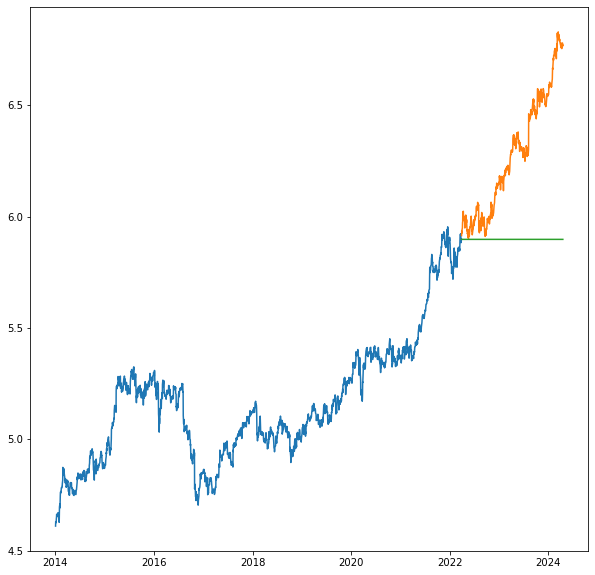

In [42]:
train_index = train.index.to_numpy()
test_index = test.index.to_numpy()

plt.plot(train_index, train.values, label='Training data')
plt.plot(test_index, test.values, label='Testing data')
plt.plot(test_index, predictions.values, label='Predictions')
plt.show()

In [43]:
forecast = arima_model.forecast(steps=21, typ='levels')

C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


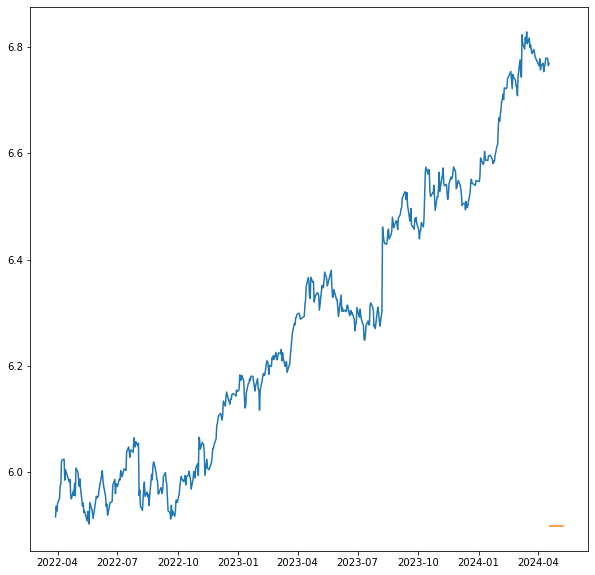

In [44]:
import pandas as pd

forecast_index = pd.date_range(test_index[-1], periods=22)[1:].to_numpy()
plt.plot(test_index, test.values, label='Testing data')
plt.plot(forecast_index, forecast.values, label='Forecast')
plt.show()

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train, order=(2,1,3), seasonal_order=(2,1,3,12))
sarima = sarima_model.fit()

C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
sarimax_predictions = sarima.predict(start = len(train), end = len(train)+len(test)-1, typ = 'levels')

C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


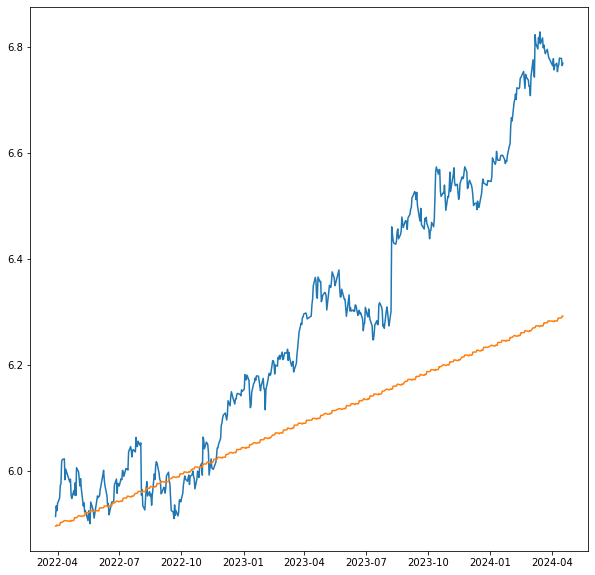

In [47]:
plt.plot(test_index, test.values, label='Testing data')
plt.plot(test_index, sarimax_predictions.values, label='Predictions')
plt.show()

C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rr14\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


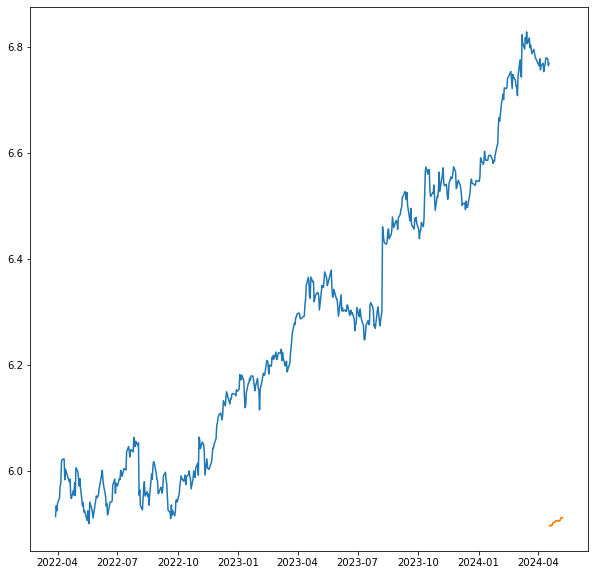

In [48]:
sarima_forecast = sarima.forecast(steps = 21)
forecast_index_sarimax = pd.date_range(test_index[-1], periods=21+1)[1:].to_numpy()
plt.plot(test_index, test.values, label='Testing data')
plt.plot(forecast_index_sarimax, sarima_forecast.values, label='Forecast')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions)

print(f'Mean Squared Error (MSE): {mse: .2f}')
print(f'Root Mean Squared Error (RMSE): {rmse: .2f}')
print(f'Mean Absolute Error (MAE): {mae: .2f}')

Mean Squared Error (MSE):  0.21
Root Mean Squared Error (RMSE):  0.46
Mean Absolute Error (MAE):  0.38


In [50]:
mse = mean_squared_error(test, sarimax_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, sarimax_predictions)

print(f'Mean Squared Error (MSE): {mse: .2f}')
print(f'Root Mean Squared Error (RMSE): {rmse: .2f}')
print(f'Mean Absolute Error (MAE): {mae: .2f}')

Mean Squared Error (MSE):  0.06
Root Mean Squared Error (RMSE):  0.24
Mean Absolute Error (MAE):  0.19
